In [64]:
set.seed(1234)
suppressPackageStartupMessages(require(rstan))
suppressPackageStartupMessages(require(ggplot2))
suppressPackageStartupMessages(require(dplyr))

In [ ]:
set.seed(1234)

log_gamma = function(x) {
  -x^2 # = - 0.5 x^2 / sigma^2, i.e. a normal with variance sigma^2 = 0.5
}

# code from the notes:

gradient = function(x) {
  -2*x
}

epsilon = 0.1

kick = function(s) {
  x = s[[1]]
  p = s[[2]]
  c(x, p + epsilon * gradient(x) / 2)
}

drift = function(s) {
  x = s[[1]]
  p = s[[2]]
  c(x + epsilon * p, p)
}

flip = function(s) {
  x = s[[1]]
  p = s[[2]]
  c(x, -p)
}

L = 5

hmc_proposal = function(s) {
  for (i in 1:L) {
    s = kick(s)
    s = drift(s)
    s = kick(s)
  }
  flip(s)
}

# part to complete below

hamiltonian = function(s) {
  x = s[[1]]
  p = s[[2]]
  U = -log_gamma(x)
  K = 0.5*sum(p^2)
  return(U + K)
}

hmc = function(initial_x, n_iteration) {
  current_x = initial_x
  samples = numeric(n_iteration)
  for (i in 1:n_iteration) {
    proposed_x = hmc_proposal(current_x)
    ratio = exp(hamiltonian(proposed_x) - hamiltonian(current_x))
    if (runif(1) <= min(ratio, 1)) {
        samples[i] = proposed_x[1]
    }
    else {
        samples[i] = current_x[1]
    }
    # sampling new momentum
    current_x = c(samples[i], rnorm(1, 0, 1))
  }
  return(samples)
}

In [66]:
initial = c(1.1, 2.3)
samples = hmc(initial, 10000)

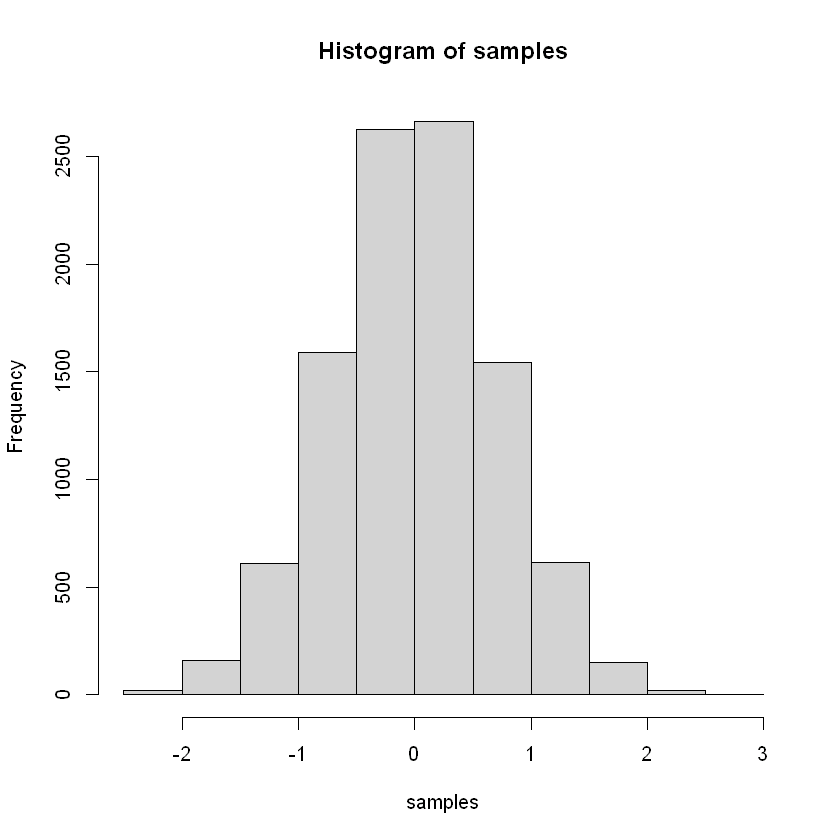

[1] -0.002670281

[1] 0.4978263

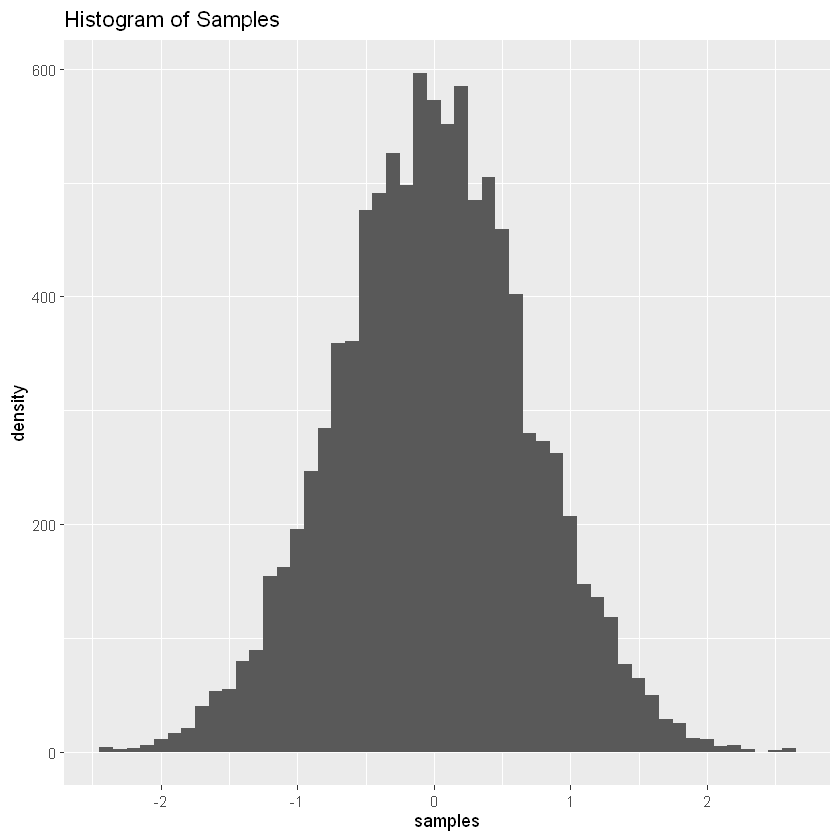

In [67]:
hist(samples)
ggplot(data.frame(samples), aes(x = samples)) +
  geom_histogram(binwidth = 0.1) +  # adjust binwidth as needed
  labs(
    title = "Histogram of Samples",
    x = "samples",
    y = "density"
  )
mean(samples)
var(samples)